# Flight Price Prediction

In this notebook, we will consider the problem of modelling flight price predicition based on the data from Kaggle website.

## Data Loading and Preparation

This section outlines the process of loading datasets, calculating distances between cities, and preparing the data for further analysis.

### Step-by-Step Process

1. **Load Datasets**:
    - Load `business.csv`, `economy.csv`, `Clean_Dataset.csv`, and `Clean_Dataset_Updated.csv`.

2. **Print DataFrame Heads**:
    - Display the first few rows of each loaded DataFrame to understand their structure.

3. **Define City Coordinates**:
    - Create a dictionary containing latitude and longitude information for major cities.

4. **Identify Missing Cities**:
    - Identify cities present in the dataset but missing from the `locations` dictionary.

5. **Calculate Distance Using Haversine Formula**:
    - Define the Haversine formula to calculate the distance between two geographical points.
    - Apply this formula to each row in the dataset to calculate the distance between `source_city` and `destination_city`.

6. **Update and Inspect DataFrame**:
    - Add a `distance` column to `Clean_Dataset_Updated.csv`.
    - Inspect the updated DataFrame.

## Import Necessary Libraries

First, we need to import the libraries that will be used throughout this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
import sys


In [2]:
# Load datasets
business_df = pd.read_csv('../datasets/business.csv')
economy_df = pd.read_csv('../datasets/economy.csv')
clean_dataset = pd.read_csv('../datasets/Clean_Dataset.csv')
clean_dataset_updated = pd.read_csv('../datasets/Clean_Dataset_Updated.csv')
business_df.head()
economy_df.head()
clean_dataset.head()
clean_dataset_updated.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,combined_date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2022-02-11
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2022-02-11
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2022-02-11
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2022-02-11
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2022-02-11


In [3]:
import pandas as pd
import numpy as np

# Create a dictionary containing city information
locations = {
    'Delhi': (28.7041, 77.1025),
    'Mumbai': (19.0760, 72.8777),
    'Bangalore': (12.9716, 77.5946),
    'Hyderabad': (17.3850, 78.4867),
    'Kolkata': (22.5726, 88.3639),
    'Chennai': (13.0827, 80.2707)
}

df = pd.read_csv('../datasets/Clean_Dataset_Updated.csv')
# Find the unique city names in the DataFrame
source_cities = set(df['source_city'].unique())
destination_cities = set(df['destination_city'].unique())
all_cities = source_cities.union(destination_cities)

# Find the missing cities in the locations dictionary
missing_cities = [city for city in all_cities if city not in locations]
print("The city lost in dictionary:", missing_cities)

def haversine(lat1, lon1, lat2, lon2):
    # Convert angles to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Calculate the difference in latitude and longitude
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Apply the Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # The Earth's radius is approximately 6371 kilometers
    km = 6371 * c
    return km

# Read the DataFrame
# clean_dataset = pd.read_csv('../datasets/Clean_Dataset.csv')
clean_dataset_updated = pd.read_csv('../datasets/Clean_Dataset_Updated.csv')
# Calculate the distance for each row and add it to a new column
clean_dataset_updated['distance'] = clean_dataset_updated.apply(lambda row: haversine(locations[row['source_city']][0],
                                                locations[row['source_city']][1],
                                                locations[row['destination_city']][0],
                                                locations[row['destination_city']][1]), axis=1)

# View the updated DataFrame
clean_dataset_updated.head()


The city lost in dictionary: []


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,combined_date,distance
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2022-02-11,1153.241291
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2022-02-11,1153.241291
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2022-02-11,1153.241291
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2022-02-11,1153.241291
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2022-02-11,1153.241291


In [4]:
clean_dataset.shape
clean_dataset.describe(include='all')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [5]:
clean_dataset.dropna(inplace=True)
clean_dataset.shape


(300153, 12)

In [6]:
clean_dataset.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Integrating Dates from Business and Economy Datasets

In this section, we aim to update the `Clean_Dataset.csv` by incorporating dates from the `business.csv` and `economy.csv` datasets. The steps are as follows:

1. **Load the Datasets**: Load `business.csv`, `Clean_Dataset.csv`, and `economy.csv`.

2. **Format Dates Consistently**: Ensure the date columns in `business.csv` and `economy.csv` are in a consistent datetime format (`%d-%m-%Y`).

3. **Combine Date Columns**: Concatenate the date columns from `economy.csv` and `business.csv` into a single series.

4. **Truncate Combined Dates**: Truncate the combined dates to match the length of `Clean_Dataset.csv`.

5. **Update Clean Dataset**: Add the combined dates as a new column, `combined_date`, to `Clean_Dataset.csv`.

6. **Save the Updated DataFrame**: Save the updated DataFrame to `Clean_Dataset_Updated.csv`.

In [7]:
import pandas as pd

# Load the datasets
business_df = pd.read_csv('../datasets/business.csv')
clean_dataset_df = pd.read_csv('../datasets/Clean_Dataset.csv')
economy_df = pd.read_csv('../datasets/economy.csv')

# Ensure the dates are in a consistent format
business_df['date'] = pd.to_datetime(business_df['date'], format='%d-%m-%Y')
economy_df['date'] = pd.to_datetime(economy_df['date'], format='%d-%m-%Y')

# Concatenate the date columns from economy and business
combined_dates = pd.concat([economy_df['date'], business_df['date']], ignore_index=True)

# Ensure the combined_dates has the same length as cleandataset
combined_dates = combined_dates[:len(clean_dataset_df)]

# Add the combined dates to cleandataset
clean_dataset_df['combined_date'] = combined_dates

# Save the updated dataframe to a new CSV
updated_file_path = '../datasets/Clean_Dataset_Updated.csv'
clean_dataset_df.to_csv(updated_file_path, index=False)

print(f"Updated file saved to {updated_file_path}")


Updated file saved to ../datasets/Clean_Dataset_Updated.csv



# Let's visualize the first few rows of the dataset

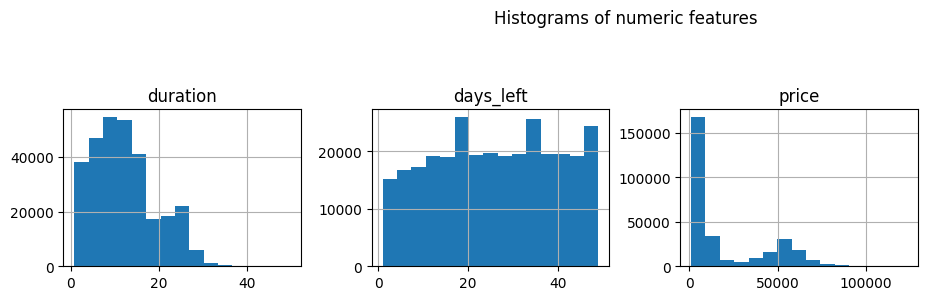

In [8]:
# Plotting histograms for all numeric features to understand distributions
# exclude the unnamed column
clean_dataset.drop('Unnamed: 0', axis=1, inplace=True)
clean_dataset.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of numeric features')
plt.show()

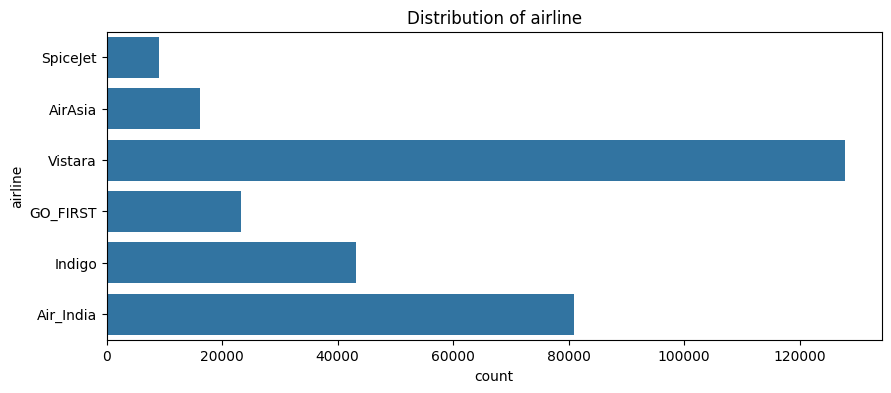

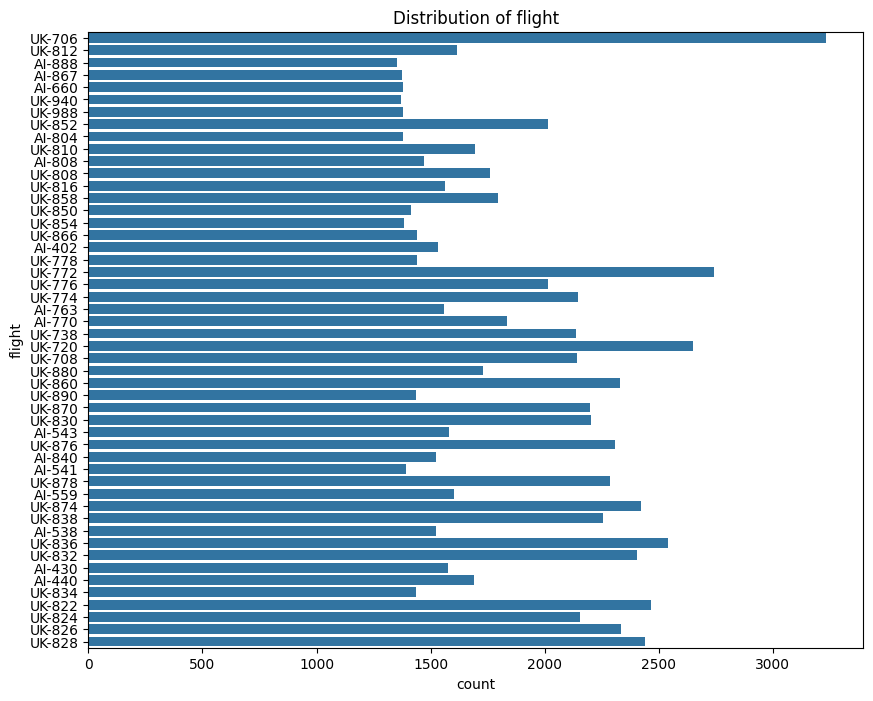

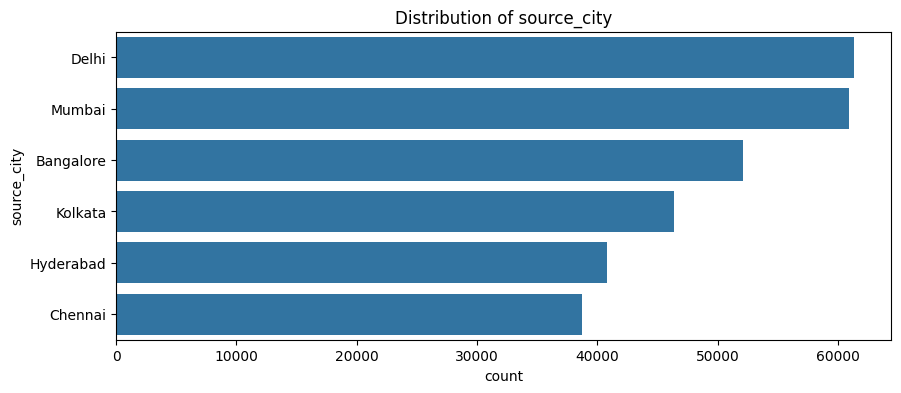

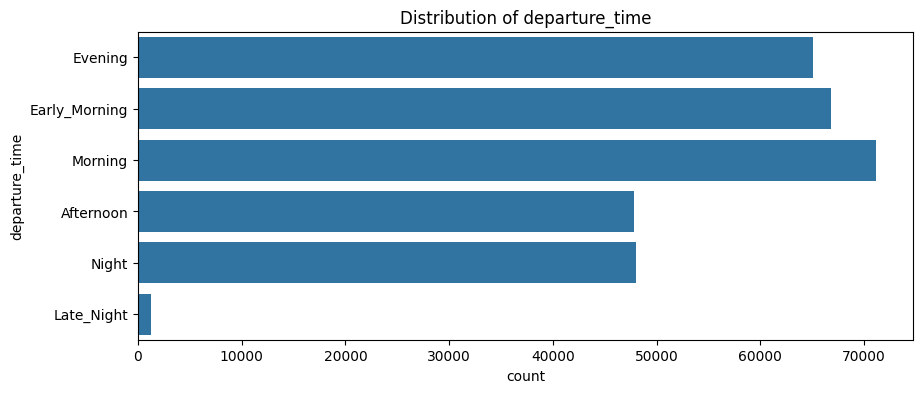

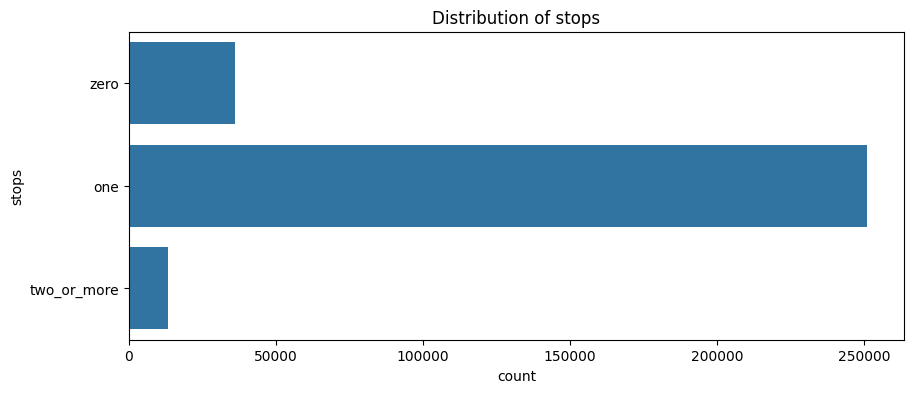

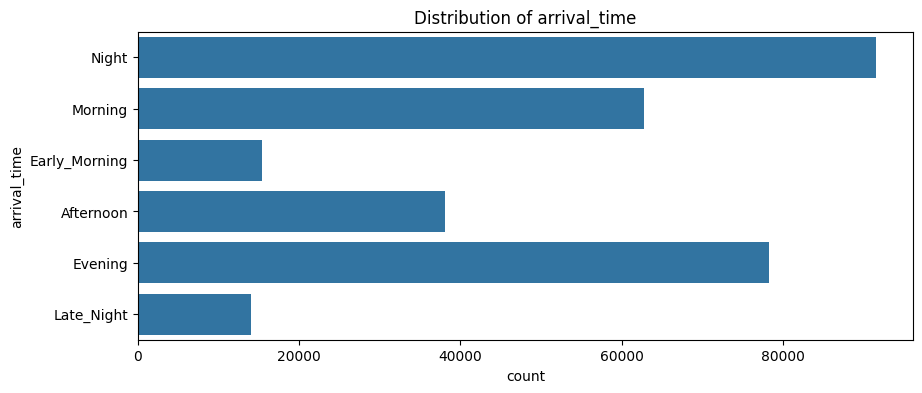

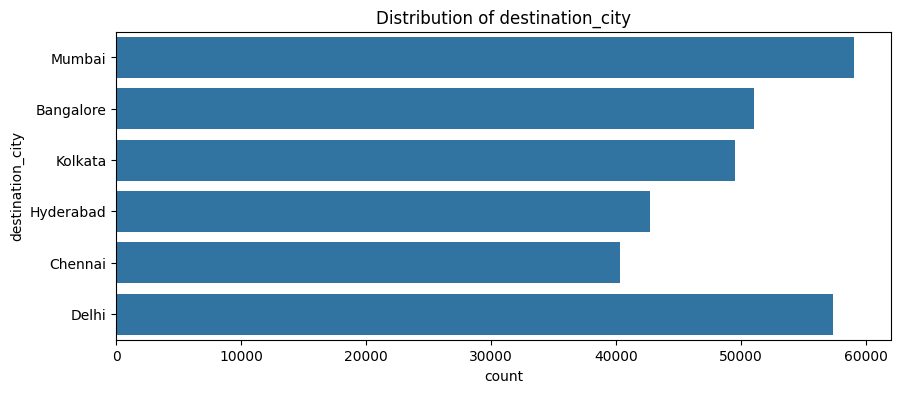

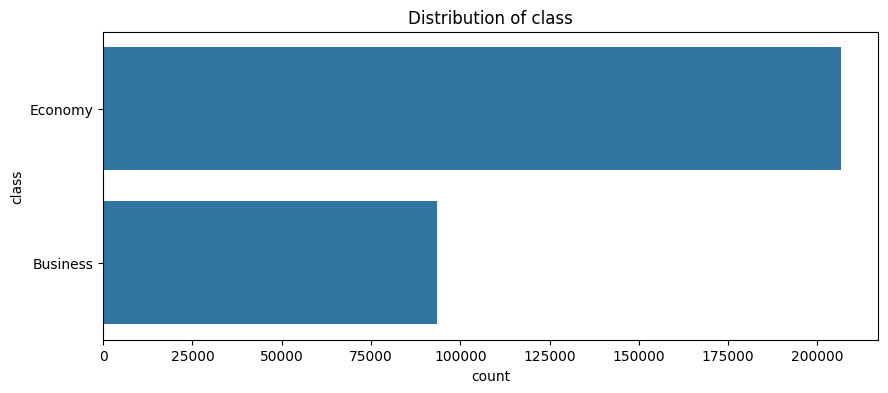

In [9]:
# For categorical data, we can use count plots to understand the distribution of categories
for column in clean_dataset.select_dtypes(include=['object']).columns:
    # Plotting count plots for all categorical features
    # If the number of categories is too high,e.g., flight, we can filter the top 50 categories to make the plot more readable
    if column != 'flight':
        plt.figure(figsize=(10, 4))
        sns.countplot(y=column, data=clean_dataset)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        top_categories = clean_dataset[column].value_counts().index[:50]  # Get top 50 categories
        filtered_data = clean_dataset[clean_dataset[column].isin(top_categories)]
        plt.figure(figsize=(10, 8))  
        sns.countplot(y=column, data=filtered_data)
        plt.yticks(fontsize=10)
        plt.title(f'Distribution of {column}')
        plt.show()
        

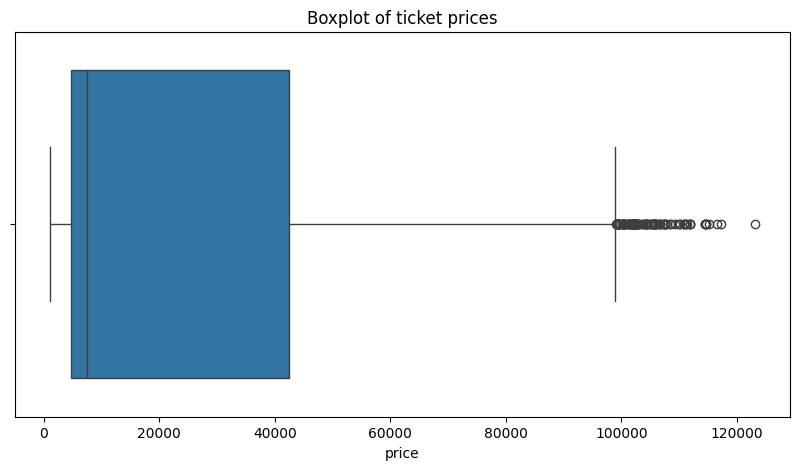

In [10]:
# Boxplot for the price column to see its distribution and spot any outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=clean_dataset['price'])
plt.title('Boxplot of ticket prices')
plt.show()

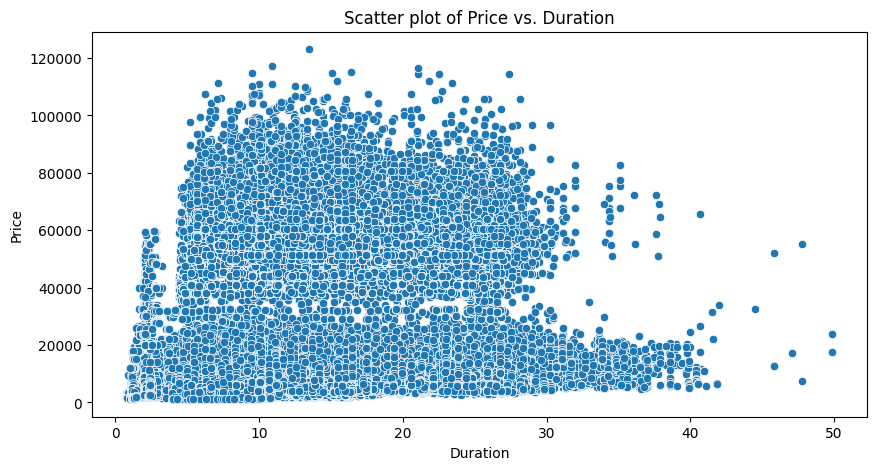

In [11]:
# A scatter plot to visualize the relationship between two variables, for example, price and duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=clean_dataset['duration'], y=clean_dataset['price'])
plt.title('Scatter plot of Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


In [12]:
# Correlation heatmap to understand the relationships between variables
# Select only the numeric columns for correlation
numeric_dataset = clean_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_dataset.corr()

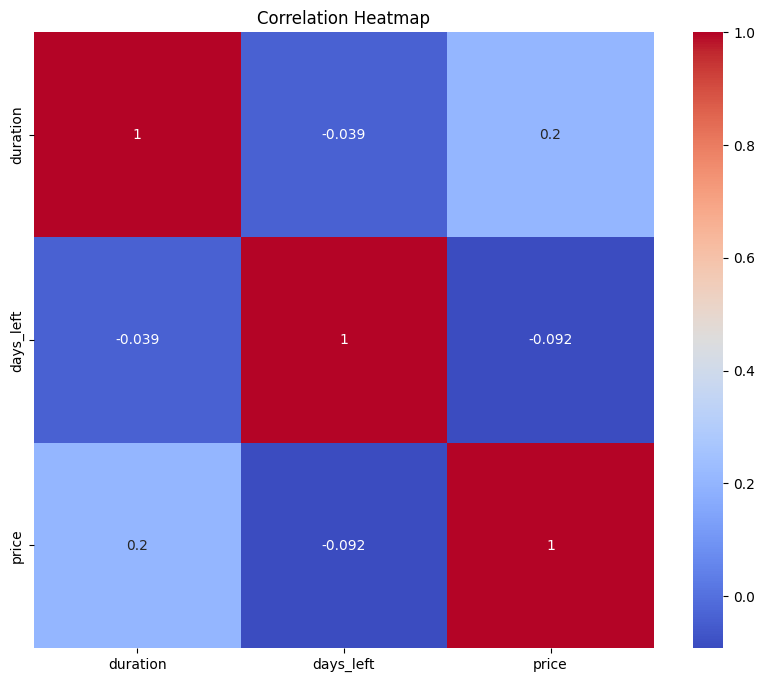

In [13]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='price'>

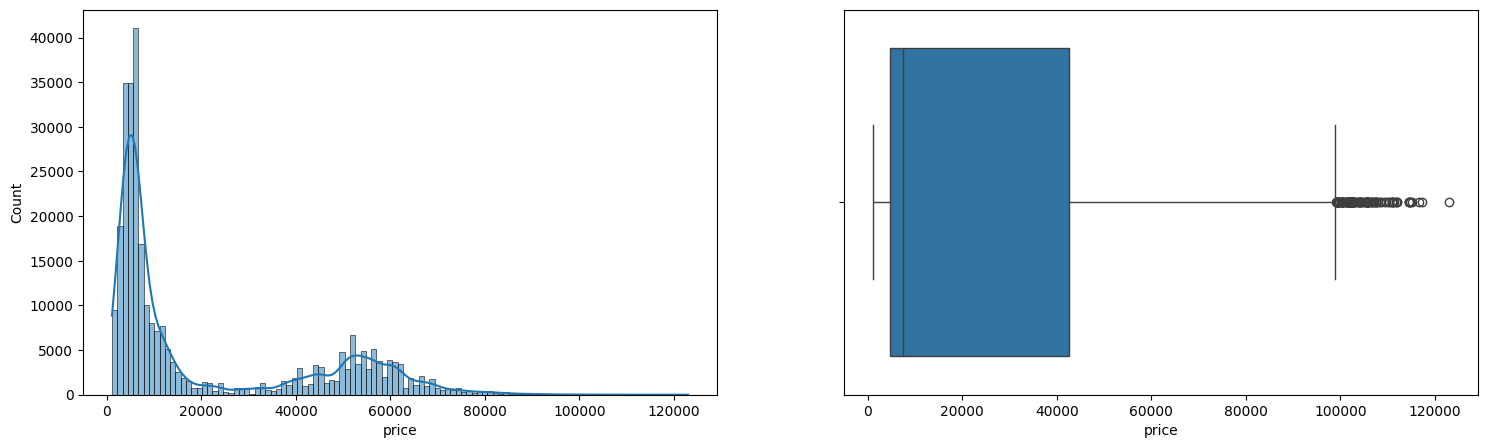

In [14]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.histplot(x = 'price', data = clean_dataset, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = 'price', data = clean_dataset)

Text(0.5, 1.0, 'Airline prices based on the class and company')

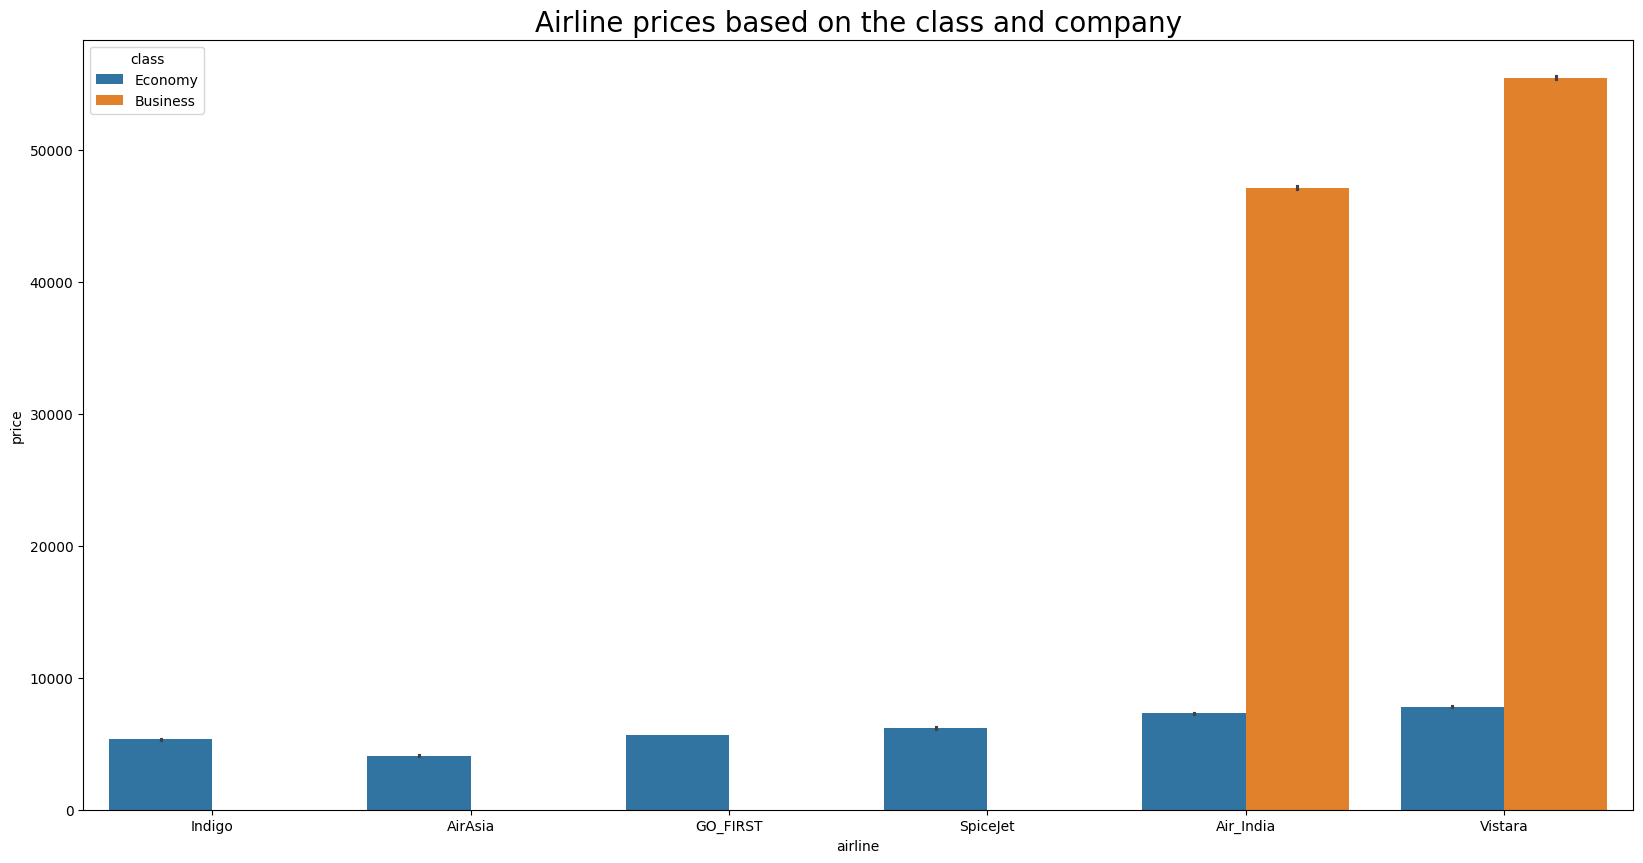

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=clean_dataset.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

# Make data transformation

This section describes the steps taken to transform the `clean_dataset` to prepare it for further analysis or modeling. The transformation includes adding new features, encoding categorical variables, and dropping unnecessary columns. The steps are as follows:

1. **Create a Copy of the Dataset**: A copy of `clean_dataset` is made to ensure the original dataset remains unchanged.

2. **Encode Class Column**: 
    - Add a new column `Economy` to indicate if the class is 'Economy'.
    - Drop the original `class` column.

3. **Map City Population Sizes**: 
    - Replace `source_city` and `destination_city` with their respective population sizes (data from 2011).
    - Drop the original `source_city` and `destination_city` columns.

4. **One-Hot Encoding for Time Columns**: 
    - Perform one-hot encoding on `departure_time` and `arrival_time` columns.

5. **Map Stops to Numerical Values**: 
    - Replace `stops` with numerical values.
    - Drop the original `stops` column.

6. **One-Hot Encoding for Airline Column**: 
    - Perform one-hot encoding on the `airline` column.

In [16]:
transformed_dataset = clean_dataset.copy()
transformed_dataset['Economy'] = clean_dataset['class'] == 'Economy'
transformed_dataset.drop('class', axis=1, inplace=True)

In [17]:
#transformed_dataset['source_city'].unique()

In [18]:
city_size = { # this is for year 2011 - https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population
    'Delhi': 110,
    'Mumbai': 124,
    'Bangalore': 84,
    'Kolkata': 44,
    'Hyderabad': 69,
    'Chennai' : 46
}
transformed_dataset['source_size'] = transformed_dataset['source_city'].replace(city_size)
transformed_dataset.drop('source_city', axis=1, inplace=True)
transformed_dataset['destination_size'] = transformed_dataset['destination_city'].replace(city_size)
transformed_dataset.drop('destination_city', axis=1, inplace=True)

/tmp/ipykernel_2570/2533689888.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_dataset['source_size'] = transformed_dataset['source_city'].replace(city_size)
/tmp/ipykernel_2570/2533689888.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_dataset['destination_size'] = transformed_dataset['destination_city'].replace(city_size)


In [19]:
transformed_dataset = pd.get_dummies(transformed_dataset,columns=['departure_time','arrival_time'])

In [20]:
stops = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2,
}
transformed_dataset['stops_num'] = transformed_dataset['stops'].replace(stops)
transformed_dataset.drop('stops', axis=1, inplace=True)

/tmp/ipykernel_2570/3828070998.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_dataset['stops_num'] = transformed_dataset['stops'].replace(stops)


In [21]:
transformed_dataset = pd.get_dummies(transformed_dataset,columns=['airline'])

In [22]:
transformed_dataset['flight_num'] = pd.factorize(transformed_dataset['flight'])[0]
transformed_dataset.drop('flight', axis=1, inplace=True)

In [23]:
transformed_dataset.head()

,duration,days_left,price,Economy,source_size,destination_size,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,...,arrival_time_Morning,arrival_time_Night,stops_num,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_num
0,2.17,1,5953,True,110,124,False,False,True,False,...,False,True,0,False,False,False,False,True,False,0
1,2.33,1,5953,True,110,124,False,True,False,False,...,True,False,0,False,False,False,False,True,False,1
2,2.17,1,5956,True,110,124,False,True,False,False,...,False,False,0,True,False,False,False,False,False,2
3,2.25,1,5955,True,110,124,False,False,False,False,...,False,False,0,False,False,False,False,False,True,3
4,2.33,1,5955,True,110,124,False,False,False,False,...,True,False,0,False,False,False,False,False,True,4


In [24]:
transformed_dataset.describe()
# output the transformed dataset to a new CSV file
transformed_dataset.to_csv('../datasets/Transformed_Dataset.csv', index=False)

## MCMC Model Training and Evaluation

This section details the process of training and evaluating a model using the `clean_dataset_updated` dataset. The steps include preparing the dataset, encoding features, calculating transition matrices, and evaluating model accuracy using 5-fold cross-validation.

### Data Preparation and Feature Engineering

1. **Ensure Date Column Type**:
    - Convert the `combined_date` column to datetime type.
    - Extract day of the week, week of the year, and month from `combined_date`.
    - Identify holidays in India and mark them in the dataset.

2. **Create Route-Class Identifier**:
    - Combine `source_city`, `destination_city`, and `class` into a single identifier column `route_class`.

3. **Discretize Price**:
    - Use `KBinsDiscretizer` to divide the `price` column into 5 intervals (`price_bin`).

4. **Group Days Left**:
    - Bin the `days_left` column into 10 intervals (`days_left_bin`).

### Cross-Validation Setup

- Initialize 5-fold cross-validation.
- Prepare dictionaries to store cross-validation results and accuracies for each route-class.

### Transition Matrix Calculation

- For each training fold:
    - Calculate transition matrices for each route-class based on time features, holidays, and days left.
    - Determine the most common initial price state for each route-class.

### Model Evaluation

- For each test fold:
    - Evaluate model accuracy for each route-class using the transition matrices.
    - Calculate overall fold accuracy and store results.

### Output Results

- Print model accuracy for each fold and the average accuracy across all folds.
- Print model accuracy for each route-class.
- Calculate and print overall MSE, R^2, and RMSE.
- Display likely price predictions for each route-class based on transition matrices.


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
import holidays

# Assume that the 'clean_dataset_updated' has a 'combined_date' column
clean_dataset_updated['combined_date'] = pd.to_datetime(clean_dataset_updated['combined_date'])

# Ensure that the 'combined_date' column has been converted to datetime type
if clean_dataset_updated['combined_date'].dtype == '<M8[ns]':
    clean_dataset_updated['day_of_week'] = clean_dataset_updated['combined_date'].dt.dayofweek
    clean_dataset_updated['week_of_year'] = clean_dataset_updated['combined_date'].dt.isocalendar().week
    clean_dataset_updated['month'] = clean_dataset_updated['combined_date'].dt.month

    # Get holidays in India
    india_holidays = holidays.country_holidays('IN', years=clean_dataset_updated['combined_date'].dt.year.unique())
    clean_dataset_updated['is_holiday'] = clean_dataset_updated['combined_date'].isin(india_holidays)


/tmp/ipykernel_2570/2493624178.py:18: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  clean_dataset_updated['is_holiday'] = clean_dataset_updated['combined_date'].isin(india_holidays)


In [26]:
# Create a combination identifier column for route and class categories
clean_dataset_updated['route_class'] = clean_dataset_updated['source_city'] + '-' + clean_dataset_updated['destination_city'] + '-' + clean_dataset_updated['class']


In [27]:
# Use KBinsDiscretizer to divide the price into several intervals
n_bins = 5
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
clean_dataset_updated['price_bin'] = binning.fit_transform(clean_dataset_updated[['price']]).astype(int)

# Group the days_left to reduce the number of unique values
days_left_bins = 10
clean_dataset_updated['days_left_bin'] = pd.cut(clean_dataset_updated['days_left'], bins=days_left_bins, labels=False)

max_bin = clean_dataset_updated['price_bin'].max() + 1  # Maximum number of states in the entire dataset


/home/siyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [28]:
# Use KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a dictionary to store cross-validation results
cv_accuracies = []
route_class_accuracies = {route_class: [] for route_class in clean_dataset_updated['route_class'].unique()}

# Initialize global lists to store all actual values and predictions
all_actuals = []
all_predictions = []


In [29]:
import time
start_time = time.time()

for train_index, test_index in kf.split(clean_dataset_updated):
    train_data = clean_dataset_updated.iloc[train_index]
    test_data = clean_dataset_updated.iloc[test_index]

    # Prepare two dictionaries to store the transition matrix and the most common initial price state for each route
    route_class_matrices = {}
    route_class_common_initial_states = {}

    # Calculate the transition probability matrix for each route
    for route_class in train_data['route_class'].unique():
        sub_df = train_data[train_data['route_class'] == route_class]
        transition_matrix = np.zeros((max_bin, max_bin))
        
        # Calculate the transition probability matrix based on time features, holidays, and days_left_bin
        for is_holiday in [True, False]:
            for day_of_week in range(7):
                for days_left_bin in range(days_left_bins):
                    filtered_data = sub_df[
                        (sub_df['is_holiday'] == is_holiday) &
                        (sub_df['day_of_week'] == day_of_week) &
                        (sub_df['days_left_bin'] == days_left_bin)
                    ]
                    for i in range(len(filtered_data) - 1):
                        current_state = int(filtered_data.iloc[i]['price_bin'])
                        next_state = int(filtered_data.iloc[i + 1]['price_bin'])
                        transition_matrix[current_state, next_state] += 1

        # Convert counts to probabilities
        row_sums = transition_matrix.sum(axis=1)
        for i in range(len(row_sums)):
            if row_sums[i] != 0:
                transition_matrix[i] /= row_sums[i]
        
        route_class_matrices[route_class] = transition_matrix
        # Find the most common initial price state for each route
        most_common_initial_state = np.argmax(sub_df['price_bin'].value_counts().values)
        route_class_common_initial_states[route_class] = most_common_initial_state

    # Testing phase: Evaluate the model fit for each route
    accuracies = {}
    
    for route_class in test_data['route_class'].unique():
        sub_df = test_data[test_data['route_class'] == route_class]
        if route_class in route_class_matrices:
            correct_predictions = 0
            total_predictions = 0
            
            for i in range(len(sub_df) - 1):
                current_state = int(sub_df.iloc[i]['price_bin'])
                next_state = int(sub_df.iloc[i + 1]['price_bin'])
                predicted_state = np.argmax(route_class_matrices[route_class][current_state])
                
                if predicted_state == next_state:
                    correct_predictions += 1
                total_predictions += 1
                
                # Collect actual values and predicted values
                all_actuals.append(next_state)
                all_predictions.append(predicted_state)
            
            if total_predictions > 0:
                accuracies[route_class] = correct_predictions / total_predictions
                route_class_accuracies[route_class].append(accuracies[route_class])

    # Calculate the average accuracy of the current fold
    fold_accuracy = np.mean(list(accuracies.values()))
    cv_accuracies.append(fold_accuracy)


In [30]:
# Output the model accuracy for each fold
for i, accuracy in enumerate(cv_accuracies):
    print(f"Fold {i+1} model accuracy: {accuracy:.2f}")

# Output the average model accuracy across all folds
print(f"Average model accuracy over 5 folds: {np.mean(cv_accuracies):.2f}")


Fold 1 model accuracy: 0.91
Fold 2 model accuracy: 0.91
Fold 3 model accuracy: 0.91
Fold 4 model accuracy: 0.91
Fold 5 model accuracy: 0.91
Average model accuracy over 5 folds: 0.91


In [31]:
# Output the model accuracy for each route class and cabin
for route_class, accuracies in route_class_accuracies.items():
    if len(accuracies) > 0:
        print(f"Average model accuracy for route and class {route_class}: {np.mean(accuracies):.2f}")
    else:
        print(f"Not enough data to evaluate model accuracy for route and class {route_class}")


Average model accuracy for route and class Delhi-Mumbai-Economy: 1.00
Average model accuracy for route and class Delhi-Bangalore-Economy: 1.00
Average model accuracy for route and class Delhi-Kolkata-Economy: 1.00
Average model accuracy for route and class Delhi-Hyderabad-Economy: 1.00
Average model accuracy for route and class Delhi-Chennai-Economy: 1.00
Average model accuracy for route and class Mumbai-Delhi-Economy: 1.00
Average model accuracy for route and class Mumbai-Bangalore-Economy: 1.00
Average model accuracy for route and class Mumbai-Kolkata-Economy: 1.00
Average model accuracy for route and class Mumbai-Hyderabad-Economy: 1.00
Average model accuracy for route and class Mumbai-Chennai-Economy: 1.00
Average model accuracy for route and class Bangalore-Delhi-Economy: 1.00
Average model accuracy for route and class Bangalore-Mumbai-Economy: 1.00
Average model accuracy for route and class Bangalore-Kolkata-Economy: 1.00
Average model accuracy for route and class Bangalore-Hyder

In [32]:
# Calculate and output overall MSE, R^2, RMSE
if all_actuals and all_predictions:
    mse = mean_squared_error(all_actuals, all_predictions)
    r2 = r2_score(all_actuals, all_predictions)
    rmse = np.sqrt(mse)
    print(f"Overall MSE: {mse:.2f}, R^2: {r2:.2f}, RMSE: {rmse:.2f}")

end_time = time.time()
print(f"Total running time: {end_time - start_time:.2f} seconds")


Overall MSE: 0.11, R^2: 0.85, RMSE: 0.32
Total running time: 318.79 seconds


In [33]:
# Get the boundaries of the price bins
bin_edges = binning.bin_edges_[0]

# Output price predictions
for route_class, matrix in route_class_matrices.items():
    initial_state = route_class_common_initial_states[route_class]
    likely_next_state = np.argmax(matrix[initial_state])
    initial_price_range = f"{bin_edges[initial_state]:.2f} to {bin_edges[initial_state + 1]:.2f}"
    next_price_range = f"{bin_edges[likely_next_state]:.2f} to {bin_edges[likely_next_state + 1]:.2f}"
    print(f"Route and class {route_class}:")
    print(f"  Most common initial price state: {initial_state} ({initial_price_range})")
    print(f"  Predicted next most likely price state: {likely_next_state} ({next_price_range})")
    print()


Route and class Delhi-Mumbai-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route and class Delhi-Bangalore-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route and class Delhi-Kolkata-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route and class Delhi-Hyderabad-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route and class Delhi-Chennai-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route and class Mumbai-Delhi-Economy:
  Most common initial price state: 0 (1105.00 to 25498.20)
  Predicted next most likely price state: 0 (1105.00 to 25498.20)

Route an

## Combining Linear Regression with DNN and PGM Features for Price Prediction

This section describes the implementation of a model that combines linear regression, deep neural networks (DNN), and probabilistic graphical models (PGM) to predict flight prices. The process includes data preprocessing, feature engineering, model training, and evaluation.

### Step-by-Step Process

1. **Data Preprocessing**:
    - Read the dataset and encode categorical features using `OrdinalEncoder`.
    - Combine encoded categorical features with numerical features.

2. **Feature Selection**:
    - Separate features into linear and nonlinear categories.
    - Prepare data for Bayesian Linear Regression using PyStan.

3. **Bayesian Linear Regression (PGM)**:
    - Define and compile a Bayesian linear regression model.
    - Extract regression coefficients from the model and create a new feature for the DNN.

4. **Deep Neural Network (DNN)**:
    - Combine linear and nonlinear features along with the PGM output.
    - Standardize the data.
    - Build and train the DNN model.

5. **Model Evaluation**:
    - Evaluate the combined model on the test set.
    - Calculate metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R²), and Root Mean Squared Error (RMSE).
    - Visualize the results.

(300153, 9) (300153,)
   duration  days_left    0    1    2    3    4    5    6
0      2.17          1  4.0  2.0  2.0  2.0  5.0  5.0  1.0
1      2.33          1  4.0  2.0  1.0  2.0  4.0  5.0  1.0
2      2.17          1  0.0  2.0  1.0  2.0  1.0  5.0  1.0
3      2.25          1  5.0  2.0  4.0  2.0  0.0  5.0  1.0
4      2.33          1  5.0  2.0  4.0  2.0  4.0  5.0  1.0
0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64
Mean Squared Error: 49200540.29
Mean Absolute Error: 4624.99
R-squared: 0.90
Root Mean Squared Error: 7014.31


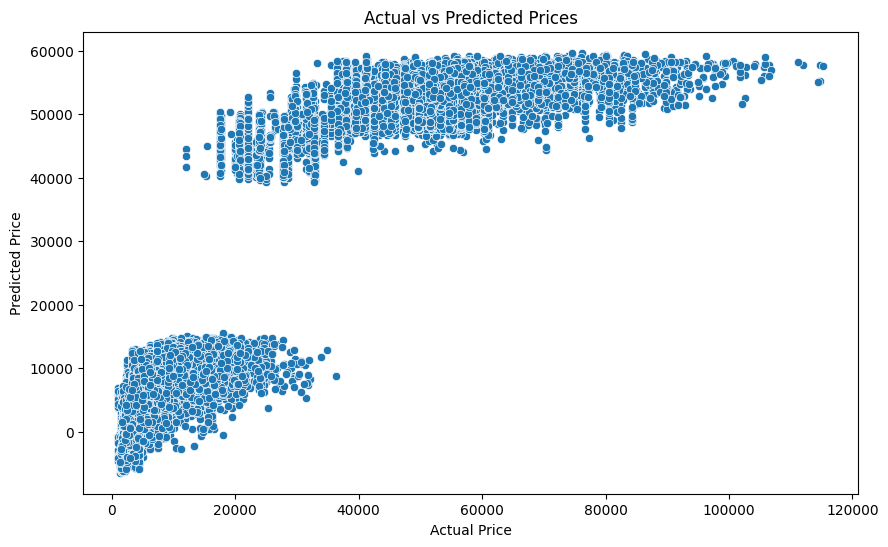

In [34]:
# linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import pandas as pd
import numpy as np

clean_dataset = pd.read_csv('../datasets/Clean_Dataset.csv')
ordinalEncoder = OrdinalEncoder()
cate_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
ordinalEncoder_features = ordinalEncoder.fit_transform(clean_dataset[cate_features])
ordinalEncoder_features

# combine the ordinal encoded features with the numeric features
final_features = pd.concat([clean_dataset[['duration', 'days_left', 'price']], pd.DataFrame(ordinalEncoder_features)], axis=1)
final_features

# feature and target variables
X = final_features.drop('price', axis = 1)
y = final_features['price']
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a linear regression model
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# calculate the root mean squared error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# plot the predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


2024-05-27 11:08:46.543637: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 11:08:48.834568: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 11:08:50.760149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6480e1d1f319fa39f3dae7fd542ccee9 NOW.
/home/siyan/.local/lib/python3.10/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This


Gradient evaluation took 0.029532 seconds
1000 transitions using 10 leapfrog steps per transition would take 295.32 seconds.
Adjust your expectations accordingly!


         three stages of adaptation as currently configured.
         Reducing each adaptation stage to 15%/75%/10% of
         the given number of warmup iterations:
           init_buffer = 7
           adapt_window = 38
           term_buffer = 5


Gradient evaluation took 0.030637 seconds
1000 transitions using 10 leapfrog steps per transition would take 306.37 seconds.
Adjust your expectations accordingly!


         three stages of adaptation as currently configured.
         Reducing each adaptation stage to 15%/75%/10% of
         the given number of warmup iterations:
           init_buffer = 7
           adapt_window = 38
           term_buffer = 5

Iteration:  1 / 100 [  1%]  (Warmup)
Iteration: 10 / 100 [ 10%]  (Warmup)
Iteration:  1 / 100 [  1%]  (Warmup)
Iteration: 10 / 100 [ 10%]  (Warmup)
Iteration: 20 / 10


 Elapsed Time: 56.1792 seconds (Warm-up)
               28.2692 seconds (Sampling)
               84.4484 seconds (Total)



/home/siyan/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 365749248.0000 - mae: 13073.1260 - val_loss: 52561604.0000 - val_mae: 4659.9834
Epoch 2/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 48502496.0000 - mae: 4465.6455 - val_loss: 43136812.0000 - val_mae: 4008.1938
Epoch 3/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 47018840.0000 - mae: 4327.7871 - val_loss: 42804552.0000 - val_mae: 4434.1704
Epoch 4/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 46103360.0000 - mae: 4286.6113 - val_loss: 40681664.0000 - val_mae: 4338.7168
Epoch 5/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 46140688.0000 - mae: 4263.8213 - val_loss: 36633464.0000 - val_mae: 3816.5642
Epoch 6/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 45286808.0000 - mae: 4217.4819 - val_loss: 37530192.0000 - val_mae: 3965.4048
Epoch 7/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 44790028.0000 - mae: 4192.9927 - val_loss: 36173936.0000 - val_mae: 3695.9714
Epoch 8/50


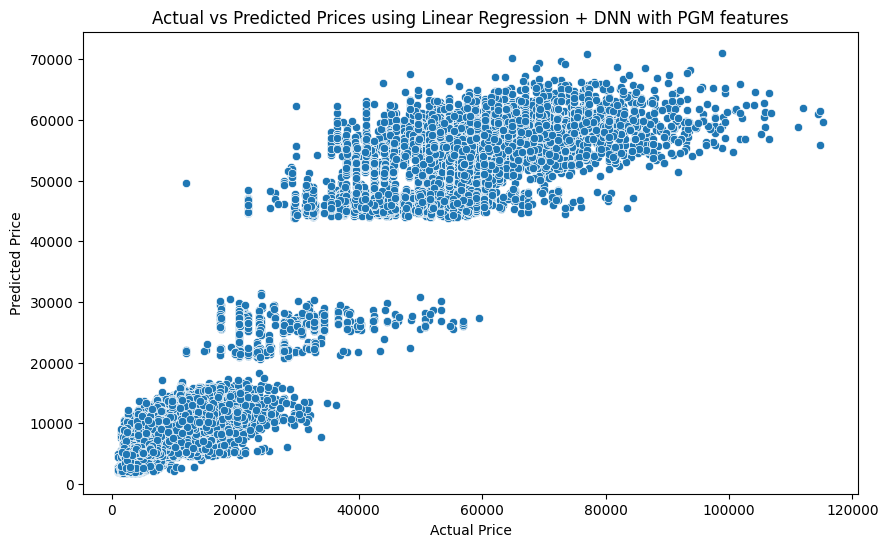

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Read data
clean_dataset = pd.read_csv('../datasets/Clean_Dataset.csv')

# Encode categorical features using OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
cate_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
ordinalEncoder_features = ordinalEncoder.fit_transform(clean_dataset[cate_features])

# Combine encoded categorical features with numerical features
encoded_df = pd.DataFrame(ordinalEncoder_features, columns=cate_features)
final_features = pd.concat([clean_dataset[['duration', 'days_left', 'price']], encoded_df], axis=1)

# Ensure all column names are of string type
final_features.columns = final_features.columns.astype(str)

# Features and target variable
X = final_features.drop('price', axis=1)
y = final_features['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear and non-linear features
linear_features = ['duration', 'days_left']
nonlinear_features = [col for col in X.columns if col not in linear_features]

# Parameter inference using Bayesian Linear Regression Model (PGM)
stan_code = """
data {
  int<lower=0> N; // Data size
  int<lower=0> K; // Number of features
  matrix[N, K] X; // Feature matrix
  vector[N] y; // Target variable
}
parameters {
  vector[K] beta; // Regression coefficients
  real alpha; // Intercept
  real<lower=0> sigma; // Noise standard deviation
}
model {
  y ~ normal(X * beta + alpha, sigma); // Normal distribution
}
"""

# Compile model
stan_model = pystan.StanModel(model_code=stan_code)

# Prepare data
data = {'N': X_train[linear_features].shape[0], 'K': X_train[linear_features].shape[1], 'X': X_train[linear_features], 'y': y_train}

# Sampling
fit = stan_model.sampling(data=data, iter=100, chains=4)

# Extract parameters from PGMs
params = fit.extract()
beta_mean = np.mean(params['beta'], axis=0)
alpha_mean = np.mean(params['alpha'])

# Add PGM outputs as features to DNN input
pgm_feature_train = (X_train[linear_features].dot(beta_mean) + alpha_mean).values.reshape(-1, 1)
pgm_feature_test = (X_test[linear_features].dot(beta_mean) + alpha_mean).values.reshape(-1, 1)

X_train_pgm = np.hstack([X_train, pgm_feature_train])
X_test_pgm = np.hstack([X_test, pgm_feature_test])

# Data standardization
scaler = StandardScaler()
X_train_nonlin = scaler.fit_transform(X_train[nonlinear_features])
X_test_nonlin = scaler.transform(X_test[nonlinear_features])

X_train_combined = np.hstack([X_train_nonlin, pgm_feature_train])
X_test_combined = np.hstack([X_test_nonlin, pgm_feature_test])

# Create DNN model
def create_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train DNN model
dnn_model = create_dnn_model(X_train_combined.shape[1])
history = dnn_model.fit(X_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = dnn_model.predict(X_test_combined).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot actual vs predicted prices scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices using Linear Regression + DNN with PGM features')
plt.show()


## PCA Analysis on Cleaned Dataset

In this section, we perform Principal Component Analysis (PCA) on a portion of the `clean_dataset_updated` dataset. The steps include sampling the data, preprocessing features, running PCA, and visualizing the results.

### Step-by-Step Process

1. **Print Dataset Columns**:
    - Confirm the columns present in the dataset.

2. **Sample the Data**:
    - Select 10% of the data for testing to make the computations manageable.

3. **Select Features for PCA**:
    - Identify the features to be used for PCA: `airline`, `source_city`, `destination_city`, `class`, `duration`, `days_left`, and `distance`.
    - Ensure the target variable `price` is included.

4. **Check for Missing Features**:
    - Ensure all selected features and the target variable are present in the sampled dataset.

5. **Preprocess Data**:
    - Use `ColumnTransformer` to standardize numerical features (`duration`, `days_left`, `distance`) and one-hot encode categorical features (`airline`, `source_city`, `destination_city`, `class`).
    - Extract features and target variable from the dataset.
    - Fit and transform the features using the preprocessor.

6. **Standardize the Preprocessed Data**:
    - Standardize the data to ensure it has a mean of 0 and standard deviation of 1.

7. **Run PCA**:
    - Create a PCA instance.
    - Fit and transform the standardized data with PCA.

8. **Visualize Results**:
    - Plot the Scree Plot to show the explained variance ratio of each principal component.
    - Plot the cumulative explained variance ratio to determine the number of principal components required to explain a significant portion of the variance.

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [37]:
# Print the column names of the dataset to confirm
print("Columns in the dataset:", clean_dataset_updated.columns)


Columns in the dataset: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'combined_date', 'distance', 'day_of_week',
       'week_of_year', 'month', 'is_holiday', 'route_class', 'price_bin',
       'days_left_bin'],
      dtype='object')


In [38]:
# Select a portion of the data for testing
sampled_data = clean_dataset_updated.sample(frac=0.1, random_state=42)  # Select 10% of the data


In [39]:
# Select the features for PCA
selected_features = ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left', 'distance']
target = 'price'


In [40]:
# Ensure all required columns are present
for feature in selected_features + [target]:
    if feature not in sampled_data.columns:
        raise ValueError(f"Missing feature: {feature}")


In [41]:
# One-hot encode categorical variables
categorical_features = ['airline', 'source_city', 'destination_city', 'class']
numerical_features = ['duration', 'days_left', 'distance']

# Create a preprocessor: standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])


In [42]:
# extract the features and target variable
X = sampled_data[selected_features]
y = sampled_data[target]


In [43]:
# Data preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Check the shape of the preprocessed data
print("Shape of preprocessed data:", X_preprocessed.shape)


Shape of preprocessed data: (30015, 23)


In [44]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)


In [45]:
# Create a PCA instance
pca = PCA(n_components=None)

# Run PCA
X_pca = pca.fit_transform(X_scaled)


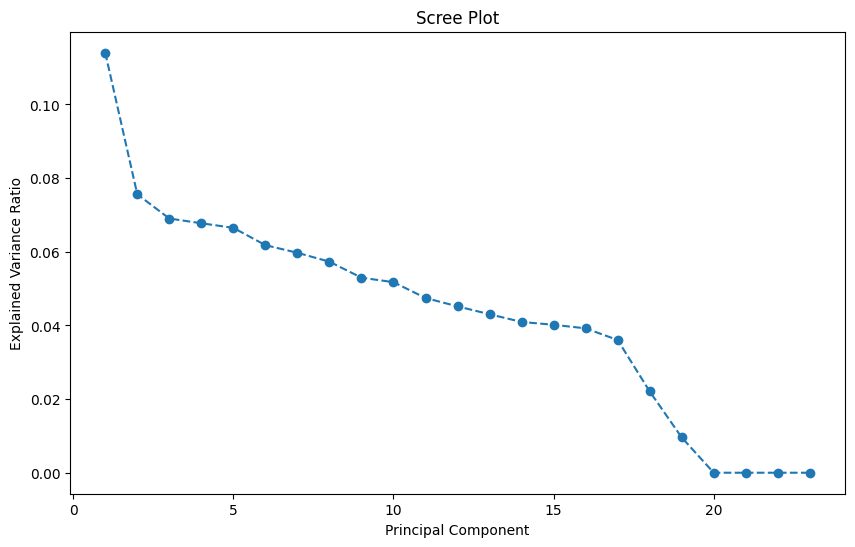

In [46]:
# Plot the Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [47]:
# Output the explained variance ratio of each principal component
print(f'Explained variance by each principal component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')


Explained variance by each principal component: [1.14035211e-01 7.56039336e-02 6.90165573e-02 6.77327648e-02
 6.64899571e-02 6.17862214e-02 5.97153844e-02 5.72980050e-02
 5.29563086e-02 5.17358682e-02 4.74469999e-02 4.51641078e-02
 4.30332257e-02 4.09375639e-02 4.01638791e-02 3.92007037e-02
 3.60336976e-02 2.20789518e-02 9.57065851e-03 1.21044185e-31
 7.22936217e-33 3.90294770e-33 2.13944202e-33]
Total explained variance: 1.0000000000000002


Cumulative explained variance: [0.11403521 0.18963915 0.2586557  0.32638847 0.39287842 0.45466465
 0.51438003 0.57167804 0.62463434 0.67637021 0.72381721 0.76898132
 0.81201455 0.85295211 0.89311599 0.93231669 0.96835039 0.99042934
 1.         1.         1.         1.         1.        ]


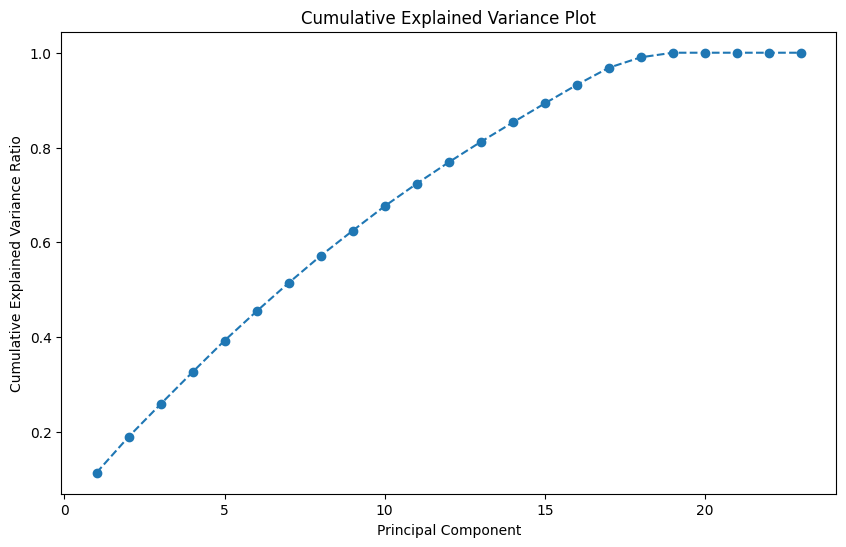

In [48]:
# Calculate cumulative explained variance ratio
cumulative_variance = explained_variance.cumsum()
print(f'Cumulative explained variance: {cumulative_variance}')


# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()


## Model Selection and Feature Importance Analysis

This section describes the steps taken to select the best regression model for predicting flight prices from the `clean_dataset_updated` dataset. The analysis includes data preprocessing, model training, hyperparameter tuning, and evaluation. Additionally, we visualize the feature importance and analyze the correlation matrix of the features.

### Step-by-Step Process

1. **Print Dataset Columns**:
    - Confirm the columns present in the dataset.

2. **Select Features and Target Variable**:
    - Identify the features to be used for the analysis: `airline`, `source_city`, `destination_city`, `class`, `duration`, `days_left`, and `distance`.
    - The target variable is `price`.

3. **Preprocess Data**:
    - Standardize numerical features (`duration`, `days_left`, `distance`) and one-hot encode categorical features (`airline`, `source_city`, `destination_city`, `class`) using `ColumnTransformer`.

4. **Split the Data**:
    - Split the dataset into training and test sets.
    - Further split the training set to create a smaller sample for initial experimentation.

5. **Define Models and Hyperparameters**:
    - Define four models: Linear Regression, Ridge Regression, Decision Tree Regressor, and Random Forest Regressor.
    - Specify hyperparameters for GridSearchCV.

6. **Perform Grid Search**:
    - Use GridSearchCV to find the best model based on the negative mean squared error (MSE).
    - Select the best model and hyperparameters based on the grid search results.

7. **Evaluate the Best Model**:
    - Evaluate the best model on the test set.
    - Calculate the mean squared error (MSE) of the predictions.
    - Visualize the actual vs predicted prices.

8. **Analyze Feature Importance**:
    - Extract and plot feature importances from the best model.
    - Visualize the correlation matrix of the features.

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [50]:
# Assuming clean_dataset_updated has been loaded as a DataFrame
# Confirm the columns included in the dataset
print("Columns in the dataset:", clean_dataset_updated.columns)

# Select the features and target variable for analysis
features = ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left', 'distance']
target = 'price'


Columns in the dataset: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'combined_date', 'distance', 'day_of_week',
       'week_of_year', 'month', 'is_holiday', 'route_class', 'price_bin',
       'days_left_bin'],
      dtype='object')


In [51]:
# One-hot encode categorical variables
categorical_features = ['airline', 'source_city', 'destination_city', 'class']
numerical_features = ['duration', 'days_left', 'distance']

# Create a preprocessor: standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

# Extract features and target
X = clean_dataset_updated[features]
y = clean_dataset_updated[target]



In [52]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use a small sample of the data for initial experimentation
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


In [53]:
# Define the models and hyperparameters to try
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1, 1.0]}),
    ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [10, 20]}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [50, 100], 'regressor__max_depth': [10, 20]})
]


In [54]:
# Perform grid search to find the best model 
best_model = None
best_score = float('inf')
best_params = None

for name, model, params in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_sample, y_train_sample)
    score = -grid_search.best_score_
    if score < best_score:
        best_score = score
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

# Print the best model and parameters
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'days_left',
                                                   'distance']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'class'])])),
                ('regressor', RandomForestRegressor(max_depth=20))])
Best Parameters: {'regressor__max_depth': 20, 'regressor__n_estimators': 100}


In [55]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Mean Squared Error on Test Set: 10959913.231577694


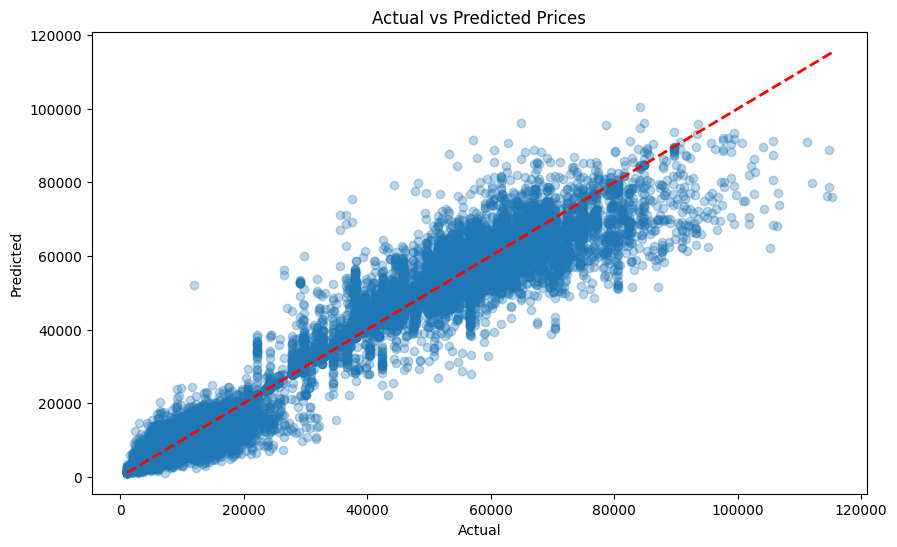

In [56]:
# visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()


In [57]:
# Influencing factors, correlation analysis
# Extract regression coefficients


# extract the regressor from the best model
regressor = best_model.named_steps['regressor']


# extract feature importances
importances = regressor.feature_importances_


# get the encoded feature names
encoded_features = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, encoded_features])

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)


# output the feature importances DataFrame
print(importances_df)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")




                       Feature  Importance
22               class_Economy    0.459372
21              class_Business    0.424111
0                     duration    0.063127
1                    days_left    0.017855
2                     distance    0.015988
8              airline_Vistara    0.005409
4            airline_Air_India    0.004620
17      destination_city_Delhi    0.001252
11           source_city_Delhi    0.001103
9        source_city_Bangalore    0.000755
15  destination_city_Bangalore    0.000716
13         source_city_Kolkata    0.000700
10         source_city_Chennai    0.000634
18  destination_city_Hyderabad    0.000617
19    destination_city_Kolkata    0.000570
20     destination_city_Mumbai    0.000569
12       source_city_Hyderabad    0.000523
14          source_city_Mumbai    0.000507
16    destination_city_Chennai    0.000491
3              airline_AirAsia    0.000488
6               airline_Indigo    0.000388
5             airline_GO_FIRST    0.000131
7          

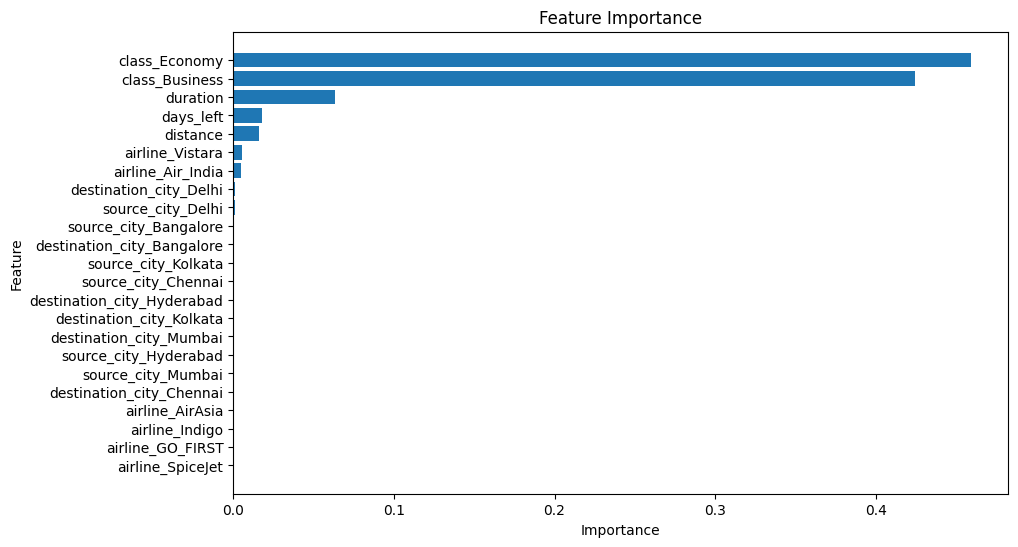

In [58]:
# Plot the regression coefficients bar chart

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


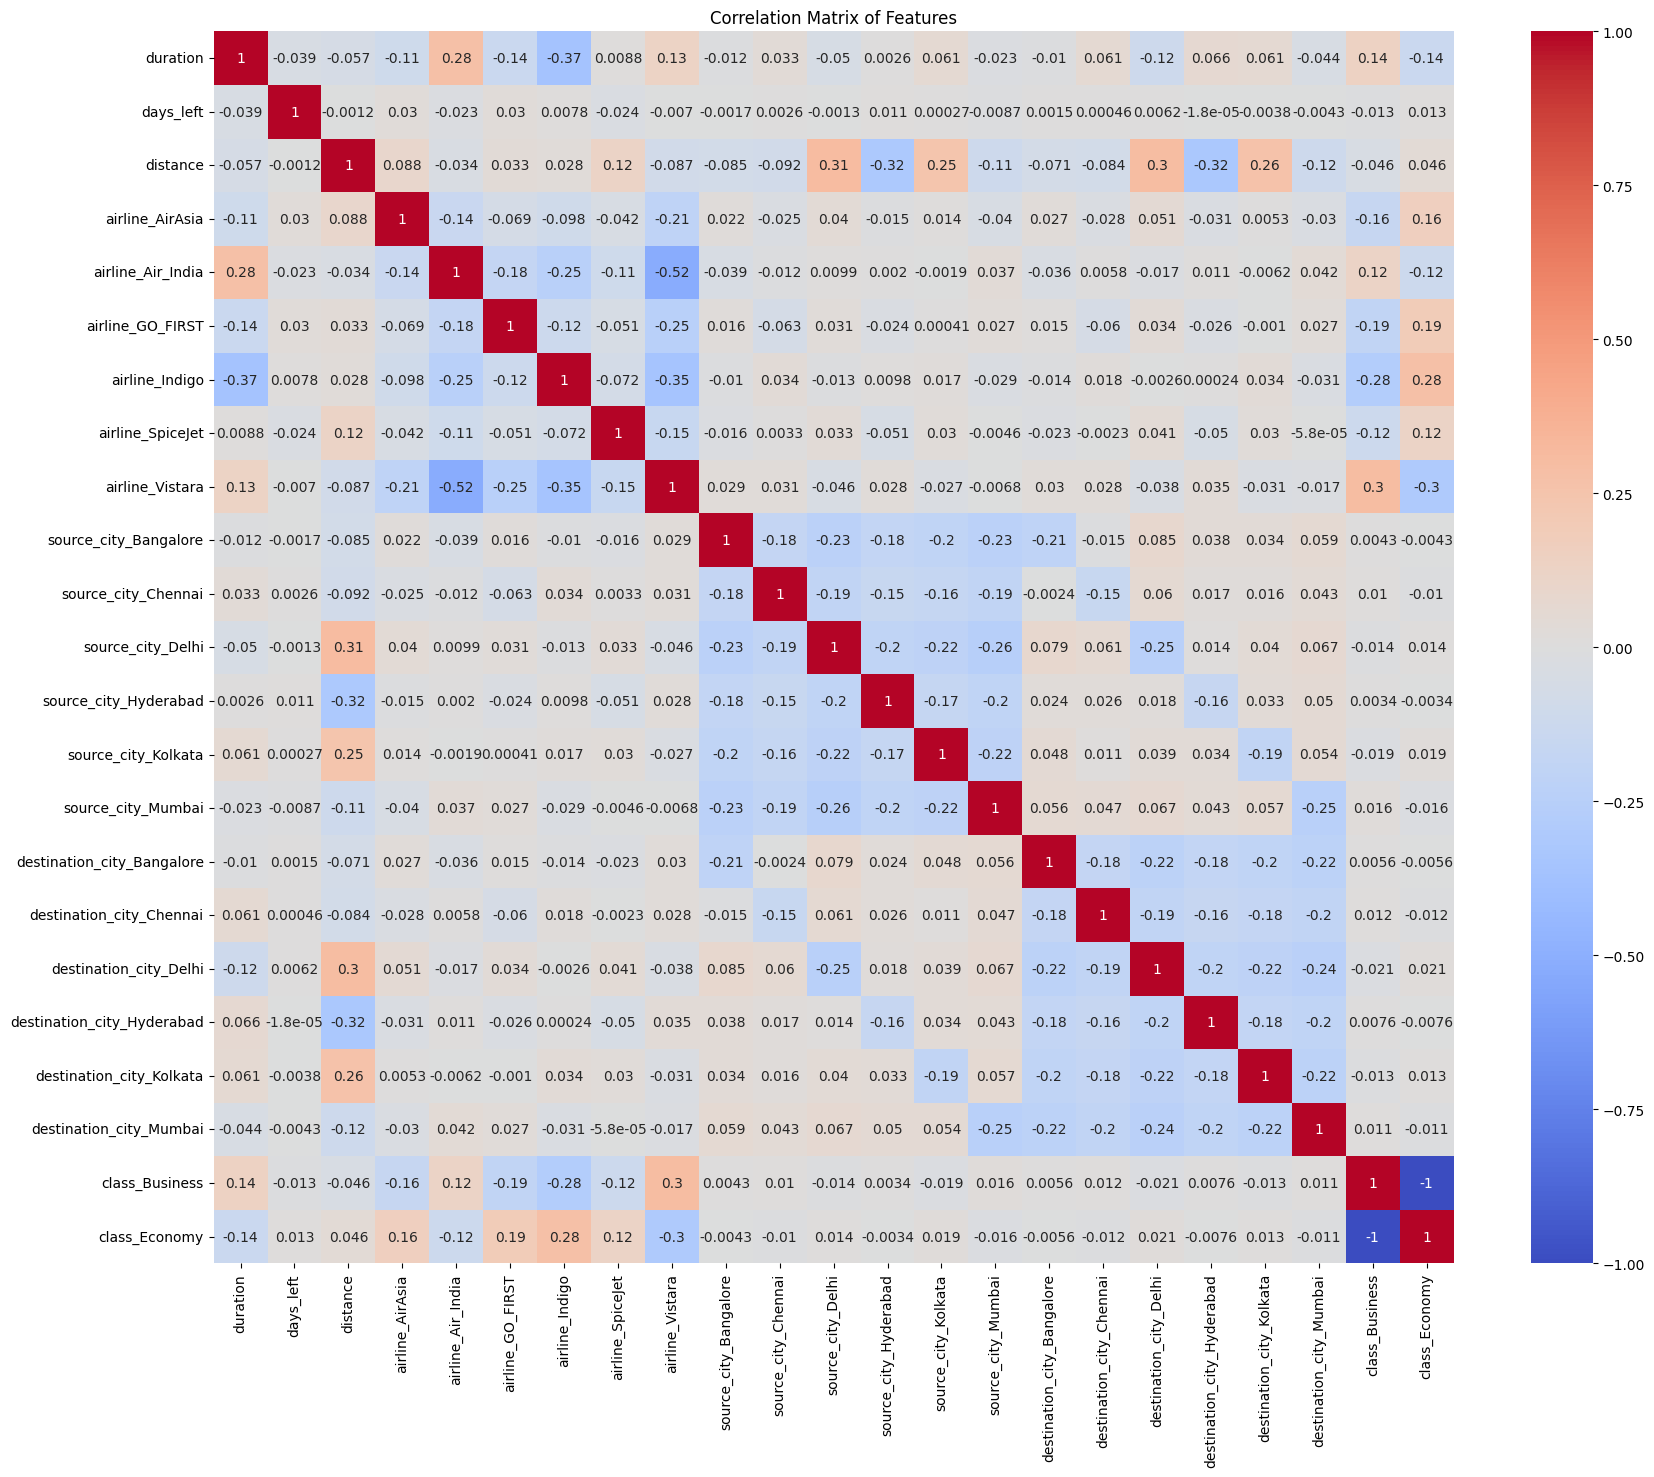

In [59]:
features = ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left', 'distance']

# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(clean_dataset_updated[features])

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()


## Deep Learning Model for Price Prediction

In this section, we develop a deep learning model using TensorFlow to predict flight prices. The process includes data preprocessing, model construction, training, and evaluation. The model incorporates feature interactions to improve predictive accuracy.

### Step-by-Step Process

1. **Print Dataset Columns**:
    - Confirm the columns present in the dataset.

2. **Select Features and Target Variable**:
    - Identify the features to be used for the analysis: `airline`, `source_city`, `destination_city`, `class`, `duration`, `days_left`, and `distance`.
    - The target variable is `price`.

3. **Preprocess Data**:
    - Standardize numerical features (`duration`, `days_left`, `distance`) and one-hot encode categorical features (`airline`, `source_city`, `destination_city`, `class`) using `ColumnTransformer`.
    - Extract features and target from the dataset.
    - Convert preprocessed features to a DataFrame.

4. **Split Data**:
    - Split the preprocessed DataFrame into training and testing sets.
    - Separate input features for the model.

5. **Build the Model**:
    - Define input layers for each feature set.
    - Create intermediate layers to capture feature interactions.
    - Construct hidden layers and an output layer.

6. **Compile and Train the Model**:
    - Compile the model with Adam optimizer and mean squared error loss function.
    - Train the model for 50 epochs with a batch size of 32.

7. **Evaluate the Model**:
    - Plot the change in loss during training.
    - Predict prices on the test set.

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [61]:
# Assuming clean_dataset_updated has been loaded as a DataFrame
print("Columns in the dataset:", clean_dataset_updated.columns)

# Select the features and target variable for analysis
features = ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left', 'distance']
target = 'price'

# One-hot encode categorical variables
categorical_features = ['airline', 'source_city', 'destination_city', 'class']
numerical_features = ['duration', 'days_left', 'distance']

# Create a preprocessor: standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

# Extract features and target
X = clean_dataset_updated[features]
y = clean_dataset_updated[target]

# Data preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert preprocessed features to DataFrame
encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, encoded_features])
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_features)


Columns in the dataset: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'combined_date', 'distance', 'day_of_week',
       'week_of_year', 'month', 'is_holiday', 'route_class', 'price_bin',
       'days_left_bin'],
      dtype='object')


In [62]:
# Split the preprocessed DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Separate input features
train_airline = X_train.filter(like='airline')
train_source_city = X_train.filter(like='source_city')
train_destination_city = X_train.filter(like='destination_city')
train_class = X_train.filter(like='class')
train_duration = X_train[['duration']]
train_days_left = X_train[['days_left']]
train_distance = X_train[['distance']]

test_airline = X_test.filter(like='airline')
test_source_city = X_test.filter(like='source_city')
test_destination_city = X_test.filter(like='destination_city')
test_class = X_test.filter(like='class')
test_duration = X_test[['duration']]
test_days_left = X_test[['days_left']]
test_distance = X_test[['distance']]


In [63]:
# Split the preprocessed DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Separate input features
train_airline = X_train.filter(like='airline')
train_source_city = X_train.filter(like='source_city')
train_destination_city = X_train.filter(like='destination_city')
train_class = X_train.filter(like='class')
train_duration = X_train[['duration']]
train_days_left = X_train[['days_left']]
train_distance = X_train[['distance']]

test_airline = X_test.filter(like='airline')
test_source_city = X_test.filter(like='source_city')
test_destination_city = X_test.filter(like='destination_city')
test_class = X_test.filter(like='class')
test_duration = X_test[['duration']]
test_days_left = X_test[['days_left']]
test_distance = X_test[['distance']]


In [64]:
# Input layers
input_airline = Input(shape=(train_airline.shape[1],), name='airline_input')
input_source_city = Input(shape=(train_source_city.shape[1],), name='source_city_input')
input_destination_city = Input(shape=(train_destination_city.shape[1],), name='destination_city_input')
input_class = Input(shape=(train_class.shape[1],), name='class_input')
input_duration = Input(shape=(1,), name='duration_input')
input_days_left = Input(shape=(1,), name='days_left_input')
input_distance = Input(shape=(1,), name='distance_input')

# Feature interactions
# Combine source_city and destination_city to generate an intermediate layer affecting duration and distance
combined_city = concatenate([input_source_city, input_destination_city])
duration_distance = concatenate([combined_city, input_duration, input_distance])

# Airline affects source_city and destination_city
combined_airline_city = concatenate([input_airline, combined_city])

# Combine all features to form the final input layer
combined_features = concatenate([input_airline, input_class, combined_airline_city, input_days_left, duration_distance])

# Construct hidden layers and output layer
dense1 = Dense(128, activation='relu')(combined_features)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
output = Dense(1, activation='linear')(dense3)

# Build the model
model = Model(inputs=[input_airline, input_source_city, input_destination_city, input_class, input_duration, input_days_left, input_distance], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# View the model structure
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ source_city_input   │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ destination_city_i… │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ airline_input       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 12)        │          0 │ source_city_inpu… │
│ (Concatenate)       │                   │            │ destination_city… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_input         │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 18)        │          0 │ airline_input[0]… │
│ (Concatenate)       │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ days_left_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 14)        │          0 │ concatenate[0][0… │
│ (Concatenate)       │                   │            │ duration_input[0… │
│                     │                   │            │ distance_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 41)        │          0 │ airline_input[0]… │
│ (Concatenate)       │                   │            │ class_input[0][0… │
│                     │                   │            │ concatenate_2[0]… │
│                     │                   │            │ days_left_input[… │
│                     │                   │            │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      5,376 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


7504/7504 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 192505648.0000 - mean_squared_error: 192505648.0000 - val_loss: 42964484.0000 - val_mean_squared_error: 42964484.0000
Epoch 2/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 42311652.0000 - mean_squared_error: 42311652.0000 - val_loss: 42399536.0000 - val_mean_squared_error: 42399536.0000
Epoch 3/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 39908180.0000 - mean_squared_error: 39908180.0000 - val_loss: 27604640.0000 - val_mean_squared_error: 27604640.0000
Epoch 4/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 26737412.0000 - mean_squared_error: 26737412.0000 - val_loss: 25444582.0000 - val_mean_squared_error: 25444582.0000
Epoch 5/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 24686468.0000 - mean_squared_error: 24686468.0000 - val_loss: 23614482.0000 - val_mean_squared_error: 23614482.0000
Epoch 6/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 22767270.0000 - mean_squared_error: 22767270.0000 -

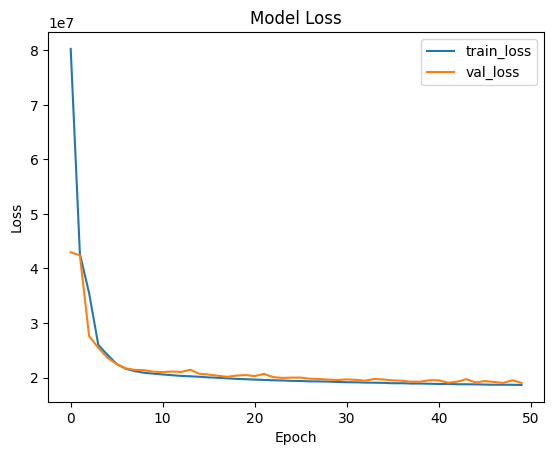

In [65]:
# Train the model
history = model.fit(
    [train_airline, train_source_city, train_destination_city, train_class, train_duration, train_days_left, train_distance],
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=([test_airline, test_source_city, test_destination_city, test_class, test_duration, test_days_left, test_distance], y_test)
)

# Plot the change in loss during training
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [66]:
# Prediction
y_pred = model.predict([test_airline, test_source_city, test_destination_city, test_class, test_duration, test_days_left, test_distance])

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-Squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")


  17/1876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step   

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Mean Squared Error: 19014324.84346018
Root Mean Squared Error: 4360.541806181908
R-Squared: 0.963113523357812


## Bayesian Neural Network for Price Prediction

This section outlines the process of developing a Bayesian Neural Network (BNN) using Pyro and PyTorch for predicting flight prices. The steps include data preprocessing, model construction, training, and evaluation.

### Step-by-Step Process

1. **Print Dataset Columns**:
    - Confirm the columns present in the dataset.

2. **Select Features and Target Variable**:
    - Identify the features to be used for the analysis: `airline`, `source_city`, `destination_city`, `class`, `duration`, `days_left`, `distance`, and `stops`.
    - The target variable is `price`.

3. **Preprocess Data**:
    - Standardize numerical features (`duration`, `days_left`, `distance`) and one-hot encode categorical features (`airline`, `source_city`, `destination_city`, `class`, `stops`) using `ColumnTransformer`.
    - Extract features and target from the dataset.
    - Convert preprocessed features to a DataFrame.

4. **Split Data**:
    - Split the preprocessed DataFrame into training and testing sets.
    - Convert the data to torch tensors.

5. **Define Bayesian Neural Network**:
    - Define input layers for each feature set.
    - Create intermediate layers to capture feature interactions.
    - Construct hidden layers and an output layer.

6. **Compile and Train the Model**:
    - Define optimizer and loss function.
    - Train the model using Stochastic Variational Inference (SVI).

7. **Evaluate the Model**:
    - Use the trained model to make predictions on the test set.
    - Calculate and print Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) values.


In [67]:
import pandas as pd
import torch
import torch.nn as nn
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [68]:
# clean_dataset_updated = pd.read_csv('../datasets/Clean_Dataset_Updated.csv')
# Assuming clean_dataset_updated has been loaded as a DataFrame
print("Columns in the dataset:", clean_dataset_updated.columns)

# Select the features and target variable for analysis
features = ['airline', 'source_city', 'destination_city', 'class', 'duration', 'days_left', 'distance', 'stops']
target = 'price'

# One-hot encode categorical variables
categorical_features = ['airline', 'source_city', 'destination_city', 'class', 'stops']
numerical_features = ['duration', 'days_left', 'distance']

# Create a preprocessor: standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

# Extract features and target
X = clean_dataset_updated[features]
y = clean_dataset_updated[target]

# Data preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert preprocessed features to DataFrame
encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_features = np.concatenate([numerical_features, encoded_features])
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Convert the data to torch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Columns after preprocessing: {all_features}")
print(f"Number of features after preprocessing: {len(all_features)}")


Columns in the dataset: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'combined_date', 'distance', 'day_of_week',
       'week_of_year', 'month', 'is_holiday', 'route_class', 'price_bin',
       'days_left_bin'],
      dtype='object')
X_train shape: torch.Size([240122, 26])
X_test shape: torch.Size([60031, 26])
Columns after preprocessing: ['duration' 'days_left' 'distance' 'airline_AirAsia' 'airline_Air_India'
 'airline_GO_FIRST' 'airline_Indigo' 'airline_SpiceJet' 'airline_Vistara'
 'source_city_Bangalore' 'source_city_Chennai' 'source_city_Delhi'
 'source_city_Hyderabad' 'source_city_Kolkata' 'source_city_Mumbai'
 'destination_city_Bangalore' 'destination_city_Chennai'
 'destination_city_Delhi' 'destination_city_Hyderabad'
 'destination_city_Kolkata' 'destination_city_Mumbai' 'class_Business'
 'class_Economy' 'stops_one' 'stops_two_or_more' 'stops_zero']

In [69]:
import torch
import torch.nn as nn
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define feature dimensions
input_dim_airline = X_train[:, :6].shape[1]  # One-hot encoded airline feature dimension
input_dim_city = X_train[:, 6:18].shape[1]  # One-hot encoded city feature dimension
input_dim_numerical = X_train[:, 18:].shape[1]  # Numerical feature dimension

class BayesianNN(PyroModule):
    def __init__(self, input_dim_airline, input_dim_city, input_dim_numerical):
        super().__init__()

        self.fc_airline = PyroModule[nn.Linear](input_dim_airline, 10)
        self.fc_airline.weight = PyroSample(dist.Normal(0., 1.).expand([10, input_dim_airline]).to_event(2))
        self.fc_airline.bias = PyroSample(dist.Normal(0., 1.).expand([10]).to_event(1))

        self.fc_city = PyroModule[nn.Linear](input_dim_city, 12)
        self.fc_city.weight = PyroSample(dist.Normal(0., 1.).expand([12, input_dim_city]).to_event(2))
        self.fc_city.bias = PyroSample(dist.Normal(0., 1.).expand([12]).to_event(1))

        combined_input_dim = 10 + 12 + input_dim_numerical
        self.fc_combined = PyroModule[nn.Linear](combined_input_dim, 30)
        self.fc_combined.weight = PyroSample(dist.Normal(0., 1.).expand([30, combined_input_dim]).to_event(2))
        self.fc_combined.bias = PyroSample(dist.Normal(0., 1.).expand([30]).to_event(1))

        self.fc_out = PyroModule[nn.Linear](30, 1)
        self.fc_out.weight = PyroSample(dist.Normal(0., 1.).expand([1, 30]).to_event(2))
        self.fc_out.bias = PyroSample(dist.Normal(0., 1.).expand([1]).to_event(1))
        
        self.relu = nn.ReLU()

    def forward(self, x_airline, x_city, x_numerical, y=None):
        x_airline = self.relu(self.fc_airline(x_airline))
        x_city = self.relu(self.fc_city(x_city))
        x_combined = torch.cat((x_airline, x_city, x_numerical), dim=1)
        x_combined = self.relu(self.fc_combined(x_combined))
        mean = self.fc_out(x_combined).squeeze(-1)
        sigma = pyro.sample("sigma", dist.Uniform(0., 10.))
        
        with pyro.plate("data", x_airline.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mean, sigma), obs=y)
        
        return mean

# Instantiate model and guide
bnn = BayesianNN(input_dim_airline, input_dim_city, input_dim_numerical)
guide = pyro.infer.autoguide.AutoDiagonalNormal(bnn)

# Define optimizer and loss function
optimizer = Adam({"lr": 0.01})
svi = SVI(bnn, guide, optimizer, loss=Trace_ELBO())

# Train the model (example code, specific training loop may need adjustment based on actual case)
#num_iterations = 1000
num_iterations = 4500
for j in range(num_iterations):
    loss = svi.step(X_train[:, :input_dim_airline], X_train[:, input_dim_airline:input_dim_airline + input_dim_city], X_train[:, input_dim_airline + input_dim_city:], y_train)
    if j % 100 == 0:
        print(f"Step {j} : loss = {loss}")

# Evaluate the model
bnn.eval()
predictive = pyro.infer.Predictive(bnn, guide=guide, num_samples=1000)
samples = predictive(
    X_test[:, :input_dim_airline], 
    X_test[:, input_dim_airline:input_dim_airline + input_dim_city], 
    X_test[:, input_dim_airline + input_dim_city:]
)

# Get the mean of the predicted values
predictions = samples["obs"].mean(0).detach().numpy()

# Calculate MSE, RMSE, and R^2
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Step 0 : loss = 2222693812396.671
Step 100 : loss = 1302426684299.5872
Step 200 : loss = 685733384797.0276
Step 300 : loss = 615829476180.835
Step 400 : loss = 566101021905.154
Step 500 : loss = 534166968318.87006
Step 600 : loss = 488293866420.3417
Step 700 : loss = 486128328460.40717
Step 800 : loss = 467087860390.3056
Step 900 : loss = 454955640427.21454
Step 1000 : loss = 439983581823.83075
Step 1100 : loss = 430337896151.9171
Step 1200 : loss = 419360256896.29926
Step 1300 : loss = 409382926425.0242
Step 1400 : loss = 391748894075.89056
Step 1500 : loss = 377884230616.1282
Step 1600 : loss = 360814824061.7006
Step 1700 : loss = 343856206277.7754
Step 1800 : loss = 324533246185.7589
Step 1900 : loss = 301976150172.6165
Step 2000 : loss = 281477671037.46277
Step 2100 : loss = 260345130929.2907
Step 2200 : loss = 238112929576.12643
Step 2300 : loss = 216904924664.19608
Step 2400 : loss = 196362601639.5636
Step 2500 : loss = 176463186756.64307
Step 2600 : loss = 158094659899.28873
Ste

Mean Absolute Error (MAE): 3337.95947265625


Predicted price: 7230.78369140625
Actual price: 7366.0


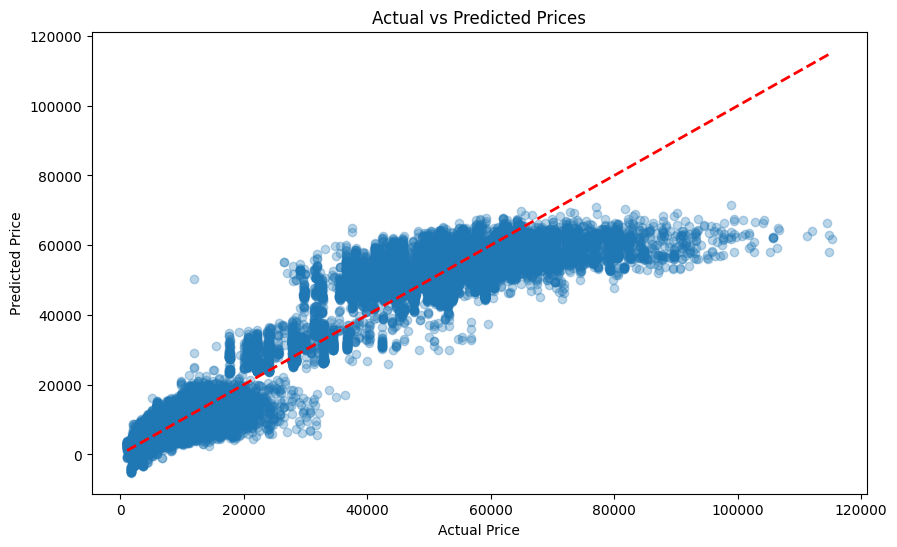

In [74]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# make a prediction
X_new = X_test[:1]
y_new = y_test[:1]
prediction = predictive(X_new[:, :input_dim_airline], X_new[:, input_dim_airline:input_dim_airline + input_dim_city], X_new[:, input_dim_airline + input_dim_city:])
print("Predicted price:", prediction["obs"].mean().item())
print("Actual price:", y_new.item())


# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()
